In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

Using the student habits dataset from Kaggle, I will be investigating positive and negative habits that effect student performance. Things like sleep, study habits, social media, and mental health will be examined. This data will be used to make recomendations for steps universities can take to help support their students.

Import, clean data

In [2]:
# Import data from csv file into a pandas dataframe
data = 'student_habits_performance.csv'
student_habits = pd.read_csv(data)
# Check the first 5 rows of the data
student_habits.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [3]:
# Check the shape of the data
student_habits.shape

(1000, 16)

In [4]:
# Check the info of the data
student_habits.info()
# Check the description of the data
student_habits.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [5]:
# Check the missing values
student_habits.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [6]:
# Unique values in the parental_education_level column
student_habits['parental_education_level'].value_counts()

parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64

In [7]:
# Check rows with parental_education_level null values
student_habits[student_habits['parental_education_level'].isnull()]

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
10,S1010,19,Female,4.6,3.7,0.8,No,77.6,5.8,Fair,1,NaN,Good,3,No,63.3
33,S1033,18,Female,4.0,0.9,1.1,No,99.5,5.8,Poor,2,NaN,Average,5,No,70.7
47,S1047,23,Female,2.5,2.9,2.7,No,83.5,7.0,Good,4,NaN,Good,8,Yes,59.7
74,S1074,21,Female,2.3,1.0,0.4,No,100.0,6.4,Fair,6,NaN,Good,1,No,66.9
93,S1093,22,Male,4.1,2.5,3.0,No,85.1,5.8,Good,4,NaN,Good,5,No,70.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,S1921,23,Female,4.4,2.7,1.0,No,79.8,6.1,Fair,6,NaN,Average,3,No,85.4
925,S1925,19,Other,1.7,2.9,1.6,Yes,97.3,8.7,Good,1,NaN,Good,7,No,53.6
939,S1939,18,Female,4.7,3.2,1.9,No,75.2,5.4,Good,3,NaN,Good,6,No,71.0
945,S1945,23,Male,6.0,2.9,2.1,Yes,98.9,6.4,Poor,0,NaN,Average,7,No,100.0


In [8]:
# fill null values with the mode
student_habits['parental_education_level'].fillna(student_habits['parental_education_level'].mode()[0], inplace=True)
# Check the missing values again
student_habits.isnull().sum()
# Check the unique values in the parental_education_level column
student_habits['parental_education_level'].value_counts()

/var/folders/pm/v1wywnps12sf4vmw4zxrydwr0000gn/T/ipykernel_45881/2019508019.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  student_habits['parental_education_level'].fillna(student_habits['parental_education_level'].mode()[0], inplace=True)


parental_education_level
High School    483
Bachelor       350
Master         167
Name: count, dtype: int64

Investigate relations in data

I believe things like getting enough sleep, higher attendence rate, mental health, excersise will all benefit student performance measured through exam scores.

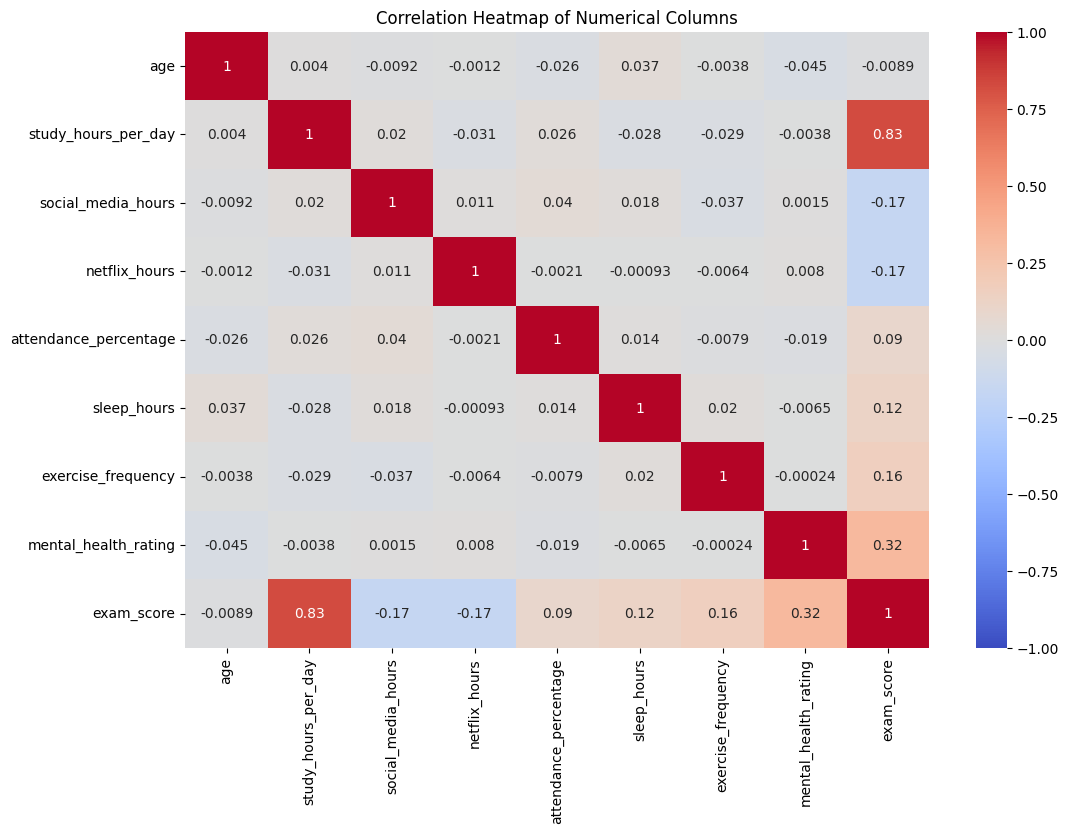

In [9]:
# Select only numerical columns for a heatmap
numerical_columns = student_habits.select_dtypes(include=['int64', 'float64']).columns
student_habits_numerical = student_habits[numerical_columns]
# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(student_habits_numerical.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


Most obvious indicator of exam score is study hours which makes sense, lets plot this out

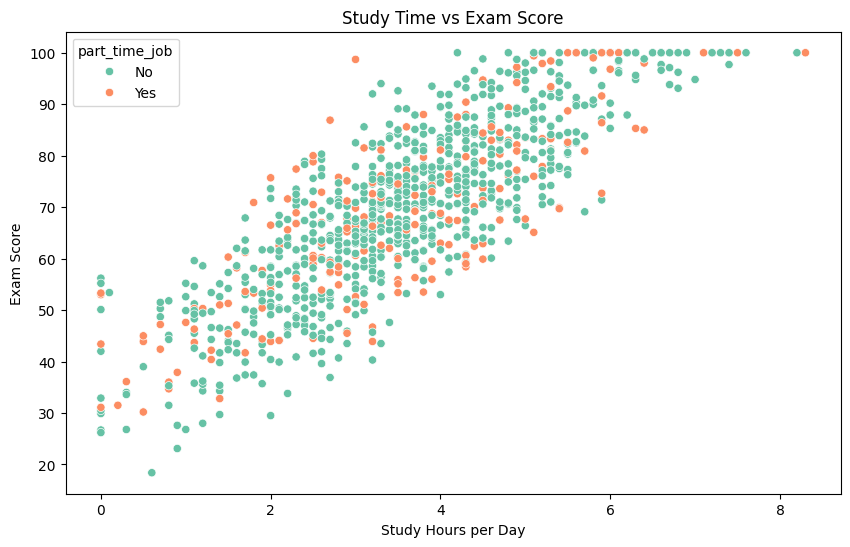

In [10]:
# Scatter plot of study time and exam scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=student_habits, hue='part_time_job', palette='Set2')
plt.title('Study Time vs Exam Score')
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.show()

How many hours should a student expect to have to study for a desired grade?

In [11]:
# Prepare data
X = student_habits[['study_hours_per_day']]
y = student_habits['exam_score']

# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Predict required study time for target scores
target_scores = np.array([70, 80, 90, 100])

# Rearranged equation: X = (y - intercept) / coef
required_study_hours = (target_scores - model.intercept_) / model.coef_[0]

# Output results
results = pd.DataFrame({
    'Target Exam Score': target_scores,
    'Required Study Hours per Day': required_study_hours.round(2)
})

print(results)


   Target Exam Score  Required Study Hours per Day
0                 70                          3.59
1                 80                          4.65
2                 90                          5.70
3                100                          6.75


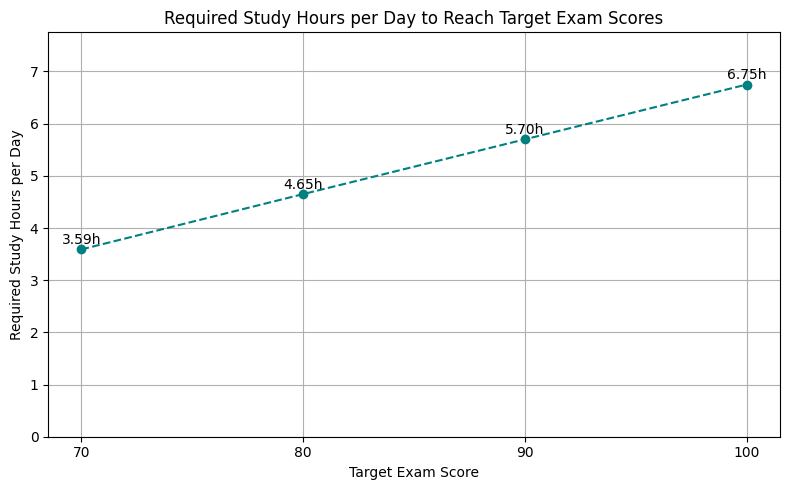

In [12]:
target_scores = [70, 80, 90, 100]
study_hours = [3.59, 4.65, 5.70, 6.75]

plt.figure(figsize=(8, 5))
plt.plot(target_scores, study_hours, marker='o', color='teal', linestyle='--')
plt.title('Required Study Hours per Day to Reach Target Exam Scores')
plt.xlabel('Target Exam Score')
plt.ylabel('Required Study Hours per Day')
plt.grid(True)
plt.xticks(target_scores)
plt.ylim(0, max(study_hours) + 1)

# Annotate points
for x, y in zip(target_scores, study_hours):
    plt.text(x, y + 0.1, f"{y:.2f}h", ha='center')

plt.tight_layout()
plt.show()

If a student wants to increase their grade by 10 points they will have to study roughly an hour more per day. This seems reasonable. It will be important for students to balance their time well if they want to be able to get higher grades as there are only so many hours in the day. Lets turn our attentiuon to sleep habits.

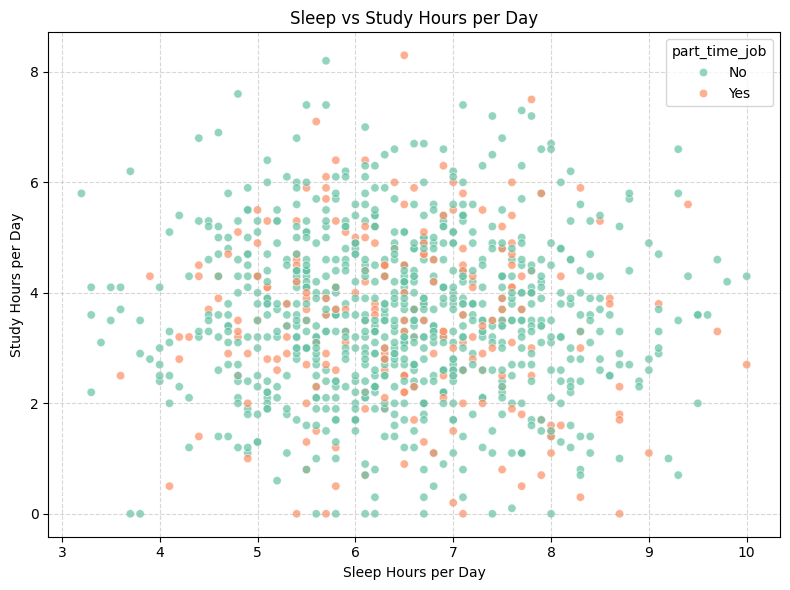

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=student_habits,
    x='sleep_hours',
    y='study_hours_per_day',
    hue='part_time_job',  # Optional: color by part-time job status
    palette='Set2',
    alpha=0.7
)

plt.title('Sleep vs Study Hours per Day')
plt.xlabel('Sleep Hours per Day')
plt.ylabel('Study Hours per Day')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


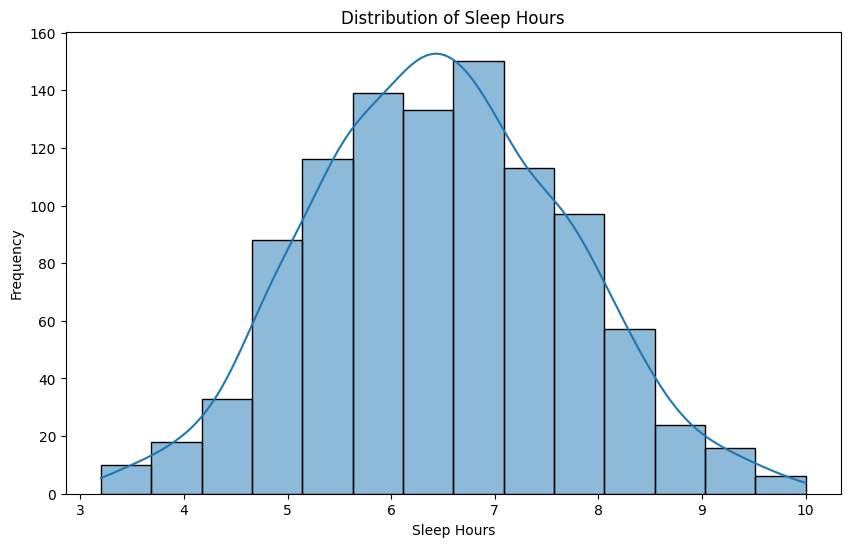

In [14]:
# Distribution of sleep hours
plt.figure(figsize=(10, 6))
sns.histplot(student_habits['sleep_hours'], bins=14, kde=True)
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.show()

Most students are getting 6+ hours of sleep which is good.

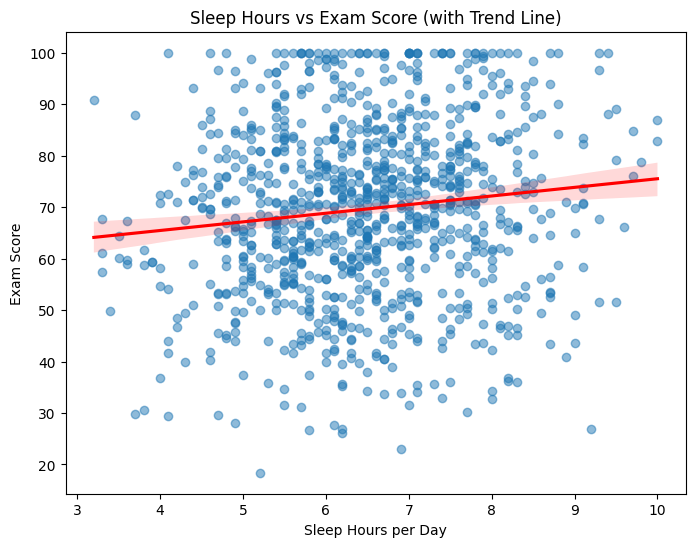

In [15]:
# Sleep vs exam score trend line
plt.figure(figsize=(8, 6))
sns.regplot(data=student_habits, x='sleep_hours', y='exam_score', scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Sleep Hours vs Exam Score (with Trend Line)')
plt.xlabel('Sleep Hours per Day')
plt.ylabel('Exam Score')
plt.show()


/var/folders/pm/v1wywnps12sf4vmw4zxrydwr0000gn/T/ipykernel_45881/887270770.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=student_habits, x='sleep_bin', y='exam_score', palette='viridis')


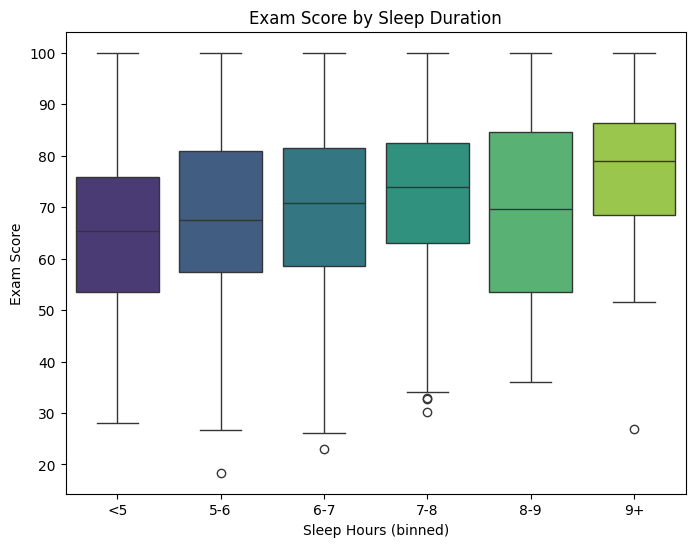

In [20]:
# Sleep time vs exam score
student_habits['sleep_bin'] = pd.cut(student_habits['sleep_hours'], bins=[0, 5, 6, 7, 8, 9, 12], labels=['<5', '5-6', '6-7', '7-8', '8-9', '9+'])

plt.figure(figsize=(8, 6))
sns.boxplot(data=student_habits, x='sleep_bin', y='exam_score', palette='viridis')
plt.title('Exam Score by Sleep Duration')
plt.xlabel('Sleep Hours (binned)')
plt.ylabel('Exam Score')
plt.show()

/var/folders/pm/v1wywnps12sf4vmw4zxrydwr0000gn/T/ipykernel_45881/3186017411.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sleep_group = student_habits.groupby('sleep_bin')['exam_score'].mean().reset_index()
/var/folders/pm/v1wywnps12sf4vmw4zxrydwr0000gn/T/ipykernel_45881/3186017411.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=sleep_group, x='sleep_bin', y='exam_score', size=20,palette='viridis')


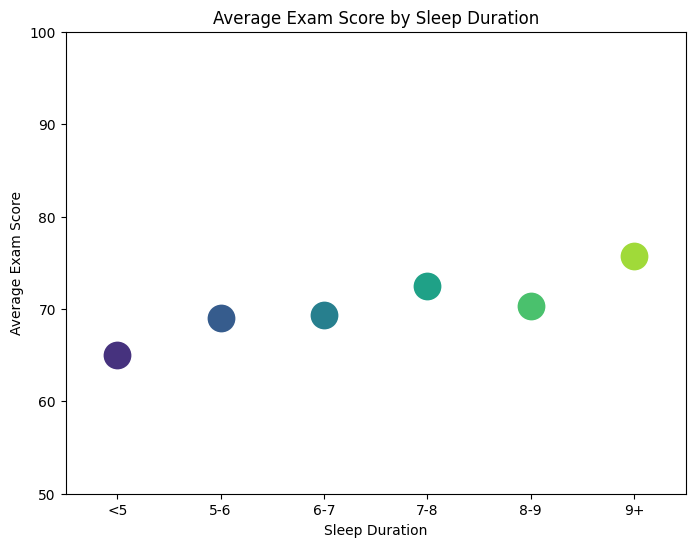

In [21]:
# Average exam score by sleep duration
sleep_group = student_habits.groupby('sleep_bin')['exam_score'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.stripplot(data=sleep_group, x='sleep_bin', y='exam_score', size=20,palette='viridis')
plt.title('Average Exam Score by Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Average Exam Score')
plt.ylim(50, 100)
plt.show()

Generally getting more sleep is increasign average exam grade.

Lets look at other habits like Attendance and screentime

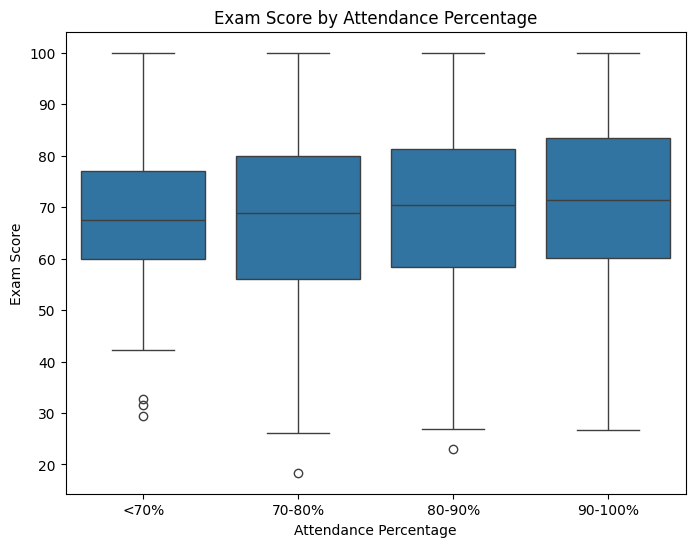

In [18]:
# Attendance vs exam score
student_habits['attendance_bin'] = pd.cut(student_habits['attendance_percentage'], bins=[0, 70, 80, 90, 100], labels=['<70%', '70-80%', '80-90%', '90-100%'])

plt.figure(figsize=(8, 6))
sns.boxplot(data=student_habits, x='attendance_bin', y='exam_score')
plt.title('Exam Score by Attendance Percentage')
plt.xlabel('Attendance Percentage')
plt.ylabel('Exam Score')
plt.show()

A pretty clean and obvious trend that students who go to class more preform better.

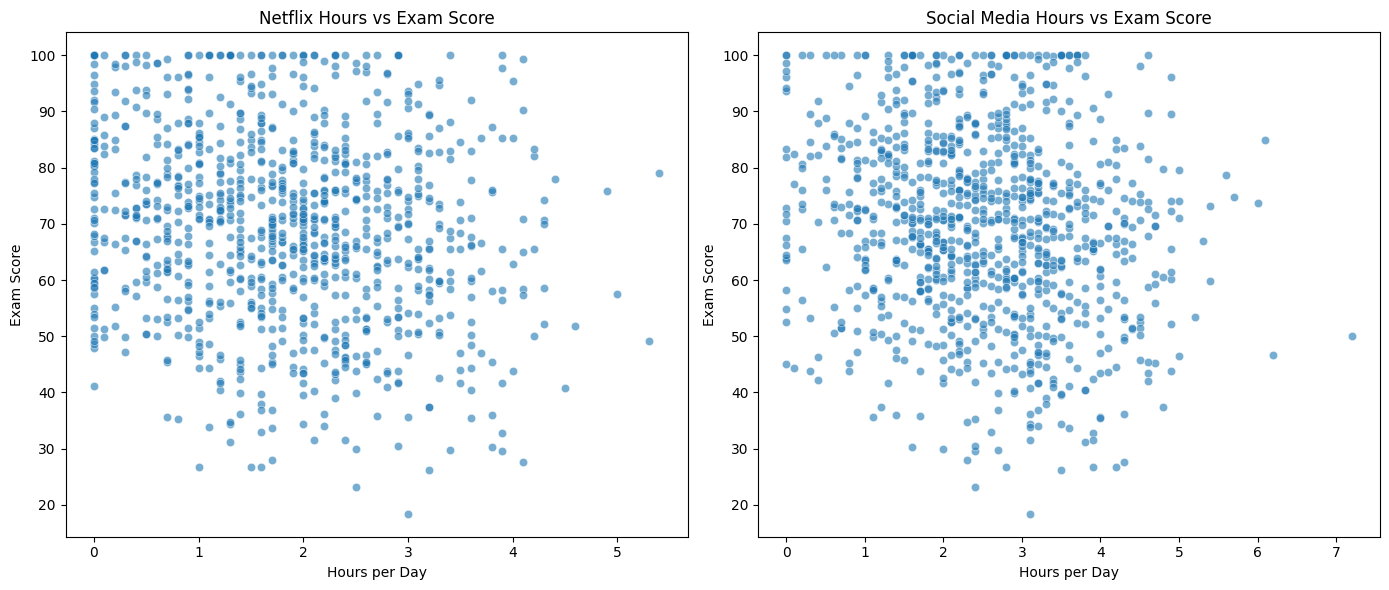

In [19]:
# Screen time vs exam score
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=student_habits, x='netflix_hours', y='exam_score', ax=ax[0], alpha=0.6)
ax[0].set_title('Netflix Hours vs Exam Score')

sns.scatterplot(data=student_habits, x='social_media_hours', y='exam_score', ax=ax[1], alpha=0.6)
ax[1].set_title('Social Media Hours vs Exam Score')

for a in ax:
    a.set_ylabel('Exam Score')
    a.set_xlabel('Hours per Day')

plt.tight_layout()
plt.show()

Lower hours of screen time has a slight correlationt to better scores, as expected too much time spent watching netflix or scrolling social media can take away from study hours or sleep.

Overall findings are generally expected. Students who get better sleep, study more, attend class, and spend less time with distractiosn such as social media and netflix generally tend to preform better on their exams. Students should aim for a minimum of 6 hours of sleep each day, attend at least 80%, preferably at least 90% of classes, and study for at least 4 and a half hours per day to give them the best shot at perofrming well on their exams.

Next steps would be to train a model on these features to find optimal combionations to recommend students based on their desired grades.